In [129]:
import numpy as np

n = 1000
max_reward = np.random.randint(10)
sample = np.random.poisson(max_reward, n)
sample -= int(max_reward / 3 )
sample[sample < 0] = 0


In [130]:
from distfit import distfit
dist = distfit(distr='popular', smooth=10)
dist.fit_transform(sample)
dist.model


[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.019223] [loc=4.110 scale=2.475]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.153303] [loc=0.000 scale=4.110]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.162513] [loc=-214087167.286 scale=214087167.286]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.0260283] [loc=3.606 scale=2.247]
[distfit] >[t         ] [0.04 sec] [RSS: 0.0192216] [loc=4.110 scale=2.475]
[distfit] >[genextreme] [0.02 sec] [RSS: 0.0221815] [loc=3.078 scale=2.217]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.023982] [loc=-2.726 scale=0.935]
[distfit] >[lognorm   ] [0.02 sec] [RSS: 0.0235414] [loc=-7.321 scale=11.167]
[distfit] >[beta      ] [0.01 sec] [RSS: 0.0209995] [loc=-0.387 scale=14.133]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.142548] [loc=0.000 scale=13.000]
[distfit] >[loggamma  ] [0.02 sec] [RSS: 0.0184676] [loc=-623.353 scale=88.154]
[distfit] >Compute confidence interval [parametric]


{'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x175689a00>,
 'stats': 'RSS',
 'params': (1234.1033772842775, -623.352772571744, 88.15443927247247),
 'name': 'loggamma',
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x14851a430>,
 'score': 0.01846761725845092,
 'loc': -623.352772571744,
 'scale': 88.15443927247247,
 'arg': (1234.1033772842775,),
 'CII_min_alpha': -0.044988603690967466,
 'CII_max_alpha': 8.211606664937108}

In [131]:
dist.model['score'] / len(sample)**0.5

0.0005839973349293935

In [139]:
import pandas as pd
pd.DataFrame(dist.predict(list(range(10))))

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


,y,y_proba,y_pred,P,y_bool
0,0,0.198228,none,0.051847,False
1,1,0.247827,none,0.108576,False
2,2,0.322220,none,0.200569,False
3,3,0.402265,none,0.328682,False
4,4,0.481646,none,0.481646,False
5,5,0.402265,none,0.362038,False
6,6,0.322220,none,0.225554,False
7,7,0.247827,none,0.123913,False
8,8,0.198228,none,0.059469,False
9,9,0.198228,up,0.024742,False


[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nloggamma\nRSS(c=1234.1, loc=-623.353, scale=88.1544)'}, xlabel='Values', ylabel='Frequency'>)

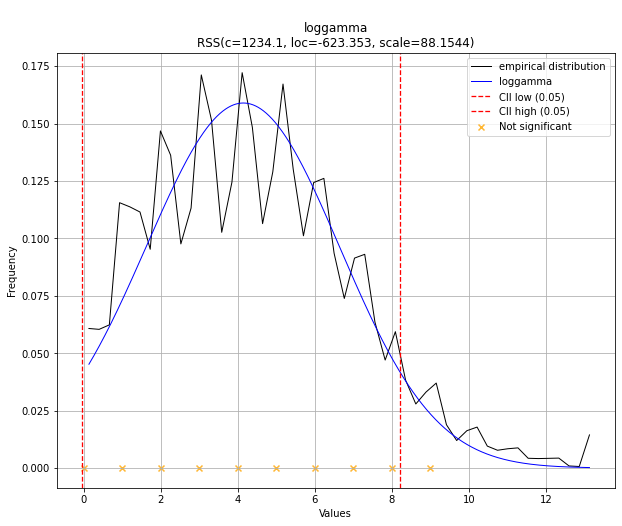

In [153]:
dist.plot()

In [150]:
dist.model['model'].cdf(range(20))


array([0.05184681, 0.10857575, 0.20056889, 0.32868208, 0.48164616,
       0.63796173, 0.7744458 , 0.87608655, 0.94053146, 0.975258  ,
       0.99113223, 0.99727659, 0.99928658, 0.99984124, 0.99997009,
       0.99999525, 0.99999936, 0.99999993, 0.99999999, 1.        ])

In [152]:
dist.model['model'].cdf

<bound method rv_frozen.cdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x14851a430>>